# Random Forest Regressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

## Load Dataset

In [ ]:
# dataset boston_test
!gdown 1Msm39yMGVmmg4muWwoFwYCWhXm0jguoz

Downloading...
From: https://drive.google.com/uc?id=1Msm39yMGVmmg4muWwoFwYCWhXm0jguoz
To: /content/boston_test.csv
100% 7.07k/7.07k [00:00<00:00, 7.52MB/s]


In [ ]:
# dataset boston_train
!gdown 1R6ZjpniNTAkWK_sjc85htPYxU0el_VA6

Downloading...
From: https://drive.google.com/uc?id=1R6ZjpniNTAkWK_sjc85htPYxU0el_VA6
To: /content/boston_train.csv
100% 27.7k/27.7k [00:00<00:00, 32.2MB/s]


In [ ]:
boston_train = pd.read_csv('boston_train.csv')
boston_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
1,19.60910,0.0,18.10,0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
2,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,13.4
3,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
4,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1


In [ ]:
boston_test = pd.read_csv('boston_test.csv')
boston_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
1,0.14866,0.0,8.56,0,0.5200,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,25.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
3,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2
4,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9


In [ ]:
print(boston_train.shape)
print(boston_test.shape)

(404, 14)
(102, 14)


In [ ]:
boston_train.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [ ]:
boston_train = boston_train.astype({'CHAS':'float','RAD':'float', 'TAX':'float'})

In [ ]:
boston_test = boston_test.astype({'CHAS':'float','RAD':'float', 'TAX':'float'})

In [ ]:
X_train = boston_train.drop(['PRICE'], axis=1)
X_test = boston_test.drop(['PRICE'], axis=1)
y_train = boston_train['PRICE']
y_test = boston_test['PRICE']

In [ ]:
boston_train.nunique()

CRIM       402
ZN          24
INDUS       70
CHAS         2
NOX         80
RM         368
AGE        300
DIS        343
RAD          9
TAX         62
PTRATIO     44
B          285
LSTAT      375
PRICE      202
dtype: int64

In [ ]:
boston_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.423852,10.818069,11.168911,0.071782,0.556195,6.278074,68.979455,3.724405,9.551980,407.712871,18.458911,353.866139,12.768267,22.409901
std,8.197229,23.061649,6.798110,0.258447,0.116187,0.691061,27.692028,1.983793,8.741662,169.344926,2.152993,95.592190,7.170852,8.940920
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,6.300000
25%,0.082598,0.000000,5.190000,0.000000,0.453000,5.888000,45.800000,2.110500,4.000000,278.500000,17.400000,374.527500,7.135000,17.175000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.198500,77.150000,3.207450,5.000000,330.000000,19.000000,391.880000,11.675000,20.950000
75%,3.694070,3.125000,18.100000,0.000000,0.624000,6.616500,93.900000,5.104475,24.000000,666.000000,20.200000,396.285000,16.605000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Eksplorasi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


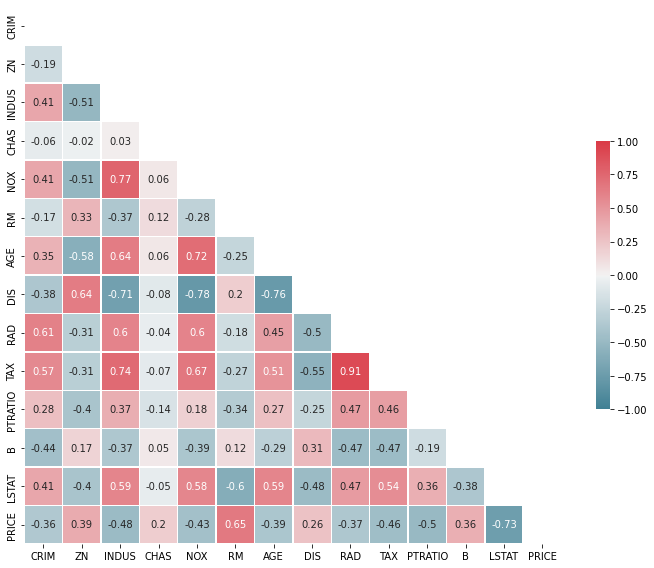

In [ ]:
# Generate and visualize the correlation matrix
corr = boston_train.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(10, 8))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

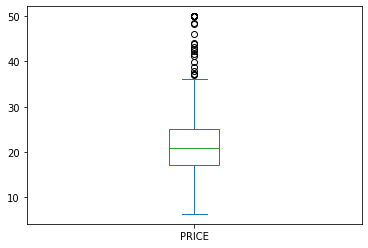

In [ ]:
boston_train['PRICE'].plot(kind='box')

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=7)

## Pemodelan

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train) 

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def RFR_hyperparameters(x):
    random_search = RandomizedSearchCV(
        estimator = x,
        param_distributions = random_grid,
        n_iter = 100,
        cv = 5,
        verbose=2,
        random_state=35,
        n_jobs = 4
        )
        
    random_search.fit(X_train, y_train)
    return random_search.best_params_

def RFR_classifier(x):
  params = RFR_hyperparameters(x)
  return RandomForestRegressor(**params), params

In [ ]:
rf_best, params = RFR_classifier(rf_model)
rf_best.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt')

In [ ]:
y_pred =  rf_best.predict(X_test)

In [ ]:
print ('Random grid: ', random_grid, '\n')

print ('Best Parameters: ', params, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}  



In [ ]:
y_pred_rf = pd.DataFrame( { "actual": y_test, 
"predicted_prob": rf_best.predict((X_test))}) 
y_pred_rf

,actual,predicted_prob
0,33.0,30.631054
1,27.5,23.241451
2,5.6,9.497465
3,21.2,21.033573
4,14.9,12.989780
...,...,...
97,22.9,24.248512
98,30.5,29.828628
99,23.3,25.234022
100,19.4,19.367320


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# View accuracy score
acc_rf_model = rf_model.score(X_test, y_test) * 100
print("Default model accuracy:",acc_rf_model,"%")

acc_rf_best = rf_best.score(X_test, y_test) * 100
print("Best params model accuracy:",acc_rf_best,"%")

Default model accuracy: 90.93844514679805 %
Best params model accuracy: 90.82516171144616 %


In [ ]:
from sklearn import metrics

# Model Evaluation for Random Forest
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred))

Mean Absolute Error (MAE): 2.1390321351909676
Mean Squared Error (MSE): 9.417864269411991
Root Mean Squared Error (RMSE): 3.0688539016075675
Mean Absolute Percentage Error (MAPE): 0.11930885474318847
Explained Variance Score: 0.9083365276431556
Max Error: 10.96343565323565
Mean Squared Log Error: 0.02494725077366524
Median Absolute Error: 1.2774732266378672
R^2: 0.9082516171144616
Mean Poisson Deviance: 0.44889556857089696
Mean Gamma Deviance: 0.027781140567264277


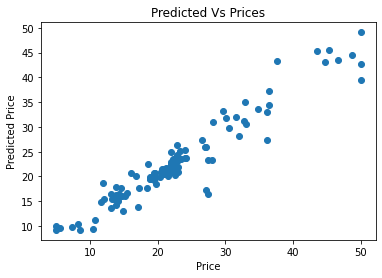

In [ ]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Prices")
plt.show()

# SVM

Train the Support Vector Machine without Hyper-parameter Tuning 

Pertama, kita akan melatih model kita dengan memanggil fungsi SVR() standar tanpa melakukan Penyetelan Hyperparameter dan melihat matriks klasifikasi dan matriks kebingungannya.

In [ ]:
XX_train = boston_train.drop(['PRICE'], axis=1)
XX_test = boston_test.drop(['PRICE'], axis=1)
yy_train = boston_train['PRICE']
yy_test = boston_test['PRICE']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
XX_train=sc.fit_transform(XX_train)
XX_test=sc.fit_transform(XX_test)

In [ ]:
from sklearn import svm

sv_model = svm.SVR()

In [ ]:
sv_model.fit(XX_train,yy_train)

SVR()

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [1, 52, 10] 
degree = [3, 8]
coef0 = [0.001, 10, 0.5]
gamma = ['auto', 'scale']

random_grid_svm = {'kernel': kernel,
  'C': C,

  'degree': degree,

  'coef0': coef0,

  'gamma': gamma,
  }

In [ ]:
from sklearn.model_selection import GridSearchCV

def SVM_hyperparameters(x):
    grid_search = GridSearchCV(
        x,
        param_grid = random_grid_svm,
        cv = 5,
    )
        
    grid_search.fit(XX_train, yy_train)
    return grid_search.best_params_

def SVM_classifier(x):
  params = SVM_hyperparameters(x)
  return svm.SVR(**params), params

In [ ]:
sv_best, param = SVM_classifier(sv_model)
sv_best.fit(XX_train, yy_train)

SVR(C=52, coef0=0.001, gamma='auto')

In [ ]:
yy_pred =  sv_best.predict(XX_test)

In [ ]:
print ('Random grid: ', random_grid_svm, '\n')

print ('Best Parameters: ', param, ' \n')

Random grid:  {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 52, 10], 'degree': [3, 8], 'coef0': [0.001, 10, 0.5], 'gamma': ['auto', 'scale']} 

Best Parameters:  {'C': 52, 'coef0': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}  



In [ ]:
y_pred_sv = pd.DataFrame( { "actual": yy_test, 
"predicted_prob": sv_best.predict((XX_test))}) 
y_pred_sv

,actual,predicted_prob
0,33.0,28.196318
1,27.5,21.754506
2,5.6,8.370539
3,21.2,23.122871
4,14.9,14.786342
...,...,...
97,22.9,23.300683
98,30.5,27.256150
99,23.3,26.342647
100,19.4,19.010057


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# View accuracy score
acc_sv_model = sv_model.score(XX_test, yy_test) * 100
print("Default model accuracy:",acc_sv_model,"%")

acc_sv_best = sv_best.score(XX_test, yy_test) * 100
print("Best params model accuracy:",acc_sv_best,"%")

Default model accuracy: 66.52442203874216 %
Best params model accuracy: 88.72376157372308 %


In [ ]:
from sklearn import metrics

# Model Evaluation for Support Vector
print("R^2",metrics.r2_score(yy_test, yy_pred))
print("Adusted R^2", 1-(1-metrics.r2_score(yy_test, yy_pred))*(len(yy_test)-1)/(len(yy_test)-XX_train.shape[1]-1))
print("MAE", metrics.mean_absolute_error(yy_test, yy_pred))
print("MSE", metrics.mean_squared_error(yy_test, yy_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(yy_test, yy_pred)))

R^2 0.8872376157372308
Adusted R^2 0.8705795362438672
MAE 2.273729271811908
MSE 11.574926950014182
RMSE 3.402194431541822


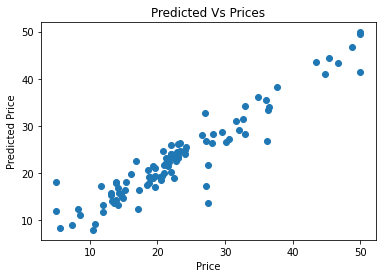

In [ ]:
# visualize the difference between the actual and predicted price 
plt.scatter(yy_test, yy_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Prices")
plt.show()